## Supervised Learning - Logistic Regression



### <font color='blue'> What is *classification*?</font> What is the difference between <font color='deepskyblue'>*regression*</font> and <font color='forestgreen'>*classification*?</font>

**Regression**: the dependent variable is continuous and we want to predict the expected value given the input features.

**Classification**: the dependent variable is binary or nominal and we want to predict the corect class given the input features.

If we had one input feature as a continuous variable we could ***see*** the classification.

<font color='magenta'>**Example**</font> Let's imagine we have data for the weights of two different animals and we would like to know whether the *weight* alone may be a good predictor for what type of animal there is.





<table><tr>
<td>
    <img src="https://i.imgur.com/JpGUIaO.png" alt="Image 1"
    width='700px'> </td>
   <td>  
   <img src="https://i.imgur.com/Pg4FBdj.png" alt="Image 2" width='710px'> </td>
</tr></table>


### <font color='blue'> Logistic Regression </font>


What we want: classify by using a probability model (an estimate of the odds-ratio) such as a **straight** line or a **sigmoid** curve.


IMPORTANT: If we divide two probability values we get an output between 0 and $\infty$ (the infinity is approached when the denominator is very close to 0 and the numerator is very close to 1.

The ***odds-ratio*** is


$$\large
\frac{\text{P}(y_i=1|\text{feature data})}{\text{P}(y_i=0|\text{feature data})}
$$

Classification by a straight line is possible but less desirable (as you can see in the picture.)

The concept of the logistic regression in a multivariate setup is to model the log of the odds ratio as a linear function of the features:

$$\large
\log\left(\frac{\text{P}(y_i=1|\text{feature data})}{\text{P}(y_i=0|\text{feature data})} \right) = \beta_0 + \beta_1 \cdot x_i
$$

where $y_i$ represents the $i-th$ output (classification) and $x_{ij}$ represent the features of the $i-th$ observation.

Fact:
$$\large
\text{P}(y_i=\text{rabbit}|\text{weight}=x_i) + \text{P}(y_i=\text{squirrel}|\text{weight}=x_i) = 1
$$

We get

$$\large
\text{P}(y_i=\text{rabbit}|\text{weight}=x_i) = \frac{1}{1+e^{-\beta_0-\beta_1 x_i}}
$$

the above function is called the "Logistic Sigmoid" (ref. Thomas Malthus)

<figure>
<center>
<img src='https://drive.google.com/uc?id=14lFmIPhJwzsefkYeCJaV_yPitZsCn9GB'
width='600px' />
<figcaption>Different types of Odds Ratio estimates</figcaption></center>
</figure>



###<font color="blue"> The Machine Learning of Logistic Regression - An Intuitive Animation </font>

The main idea is that we approximate the probability of Class 1 by using a logistic sigmoid:

$$\large
p_i\overset{\Delta}{=}\text{P}(y_i=1|\text{weight}=x_i) = \frac{1}{1+e^{-\beta_0-x_i\cdot \beta}}
$$

The machine is updating the weights $\beta$ by using the gradient of the following objective function:

$$\large
\text{Loss}(\beta_0,\beta)\overset{\Delta}{=}-\frac{1}{n}\sum_{i=1}^{n}\left[y_i\cdot\text{log}( p_i) + (1-y_i)\cdot \text{log}(1-p_i)\right]
$$


<figure>
<center>
<img src='https://drive.google.com/uc?id=11nNrxrxSqC7uUKTUIf1YFrzVSgDOzHeQ'
width='800px' />
<figcaption>Different types of Odds Ratio estimates</figcaption></center>
</figure>



### <font color='blue'>  Multiple Classes </font>

Logistic regression is a fundamental method in statistical modeling used for binary classification problems. It estimates the probability that a given input belongs to a certain category. However, many real-world problems require classification into more than two categories, leading to the need for logistic regression models that can handle multiple classes, in which case we estimate probability values for each class and harden the classification based on the highest probability.

### <font color='blue'> Logistic Regression for Multiple Classes </font>

When dealing with multiple classes, logistic regression extends to what is known as **multinomial logistic regression** or **softmax regression**. Here's a brief overview:

1. **Multinomial Logistic Regression**:
   - **Goal**: Classify observations into one of $K$ possible classes.
   - **Approach**: Use the softmax function to predict the probabilities of each class.
   - **Softmax Function**: The softmax function is an extension of the logistic function. It converts raw scores (logits) from the linear model into probabilities that sum to one.
   
   Given an input $ \mathbf{x} $ and weights $ \mathbf{W} $, the probability of class $ k $ is given by:
   $$
   P(y = k \mid \mathbf{x}) = \frac{\exp(\mathbf{w}_k^\top \mathbf{x})}{\sum_{j=1}^{K} \exp(\mathbf{w}_j^\top \mathbf{x})}
   $$
   where $ \mathbf{w}_k $ is the weight vector for class $ k $.

2. **Model Training**:
   - The parameters $ \mathbf{W} $ are typically estimated using Maximum Likelihood Estimation (MLE).
   - The likelihood function for multinomial logistic regression involves the softmax probabilities.

### <font color='blue'> Concept of Multi-class Crossentropy </font>

To train a multinomial logistic regression model, we use the **cross-entropy loss function**. Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

1. **Cross-Entropy Loss**:
   - In the context of multi-class classification, the cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1.
   - The loss increases as the predicted probability diverges from the actual label.

2. **Formula**:
   - Suppose we have $N$ samples and $K$ classes. For each sample $i$, let $ \mathbf{y}_i $ be the one-hot encoded true label, and $\hat{\mathbf{y}}_i$ be the predicted probability distribution from the softmax function.
   - The cross-entropy loss for a single sample $i$ is: $$L_i = -\sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})$$ where $ y_{i,k} $ is 1 if sample $ i $ belongs to class $ k $, and 0 otherwise.
   - The total cross-entropy loss over all samples is the average of the individual losses:
     $$
     L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})
     $$

3. **Interpretation**:
   - The cross-entropy loss function effectively penalizes the model more when the predicted probability of the true class is low.
   - Minimizing this loss encourages the model to produce high probabilities for the correct classes.

###<font color='blue'> Summary </font>

- **Multinomial Logistic Regression**: Extends logistic regression to handle multiple classes using the softmax function.
- **Multi-class Crossentropy**: A loss function used to evaluate the performance of a multi-class classification model by measuring the difference between predicted probabilities and actual labels.

By understanding these concepts, you can effectively apply logistic regression to multi-class classification problems and evaluate the performance of your models using the cross-entropy loss.

### Code Applications
---

#### Setup

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd

# import seaborn: very important to easily plot histograms and density estimations
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats
from scipy.stats import norm

#### Simulation Study

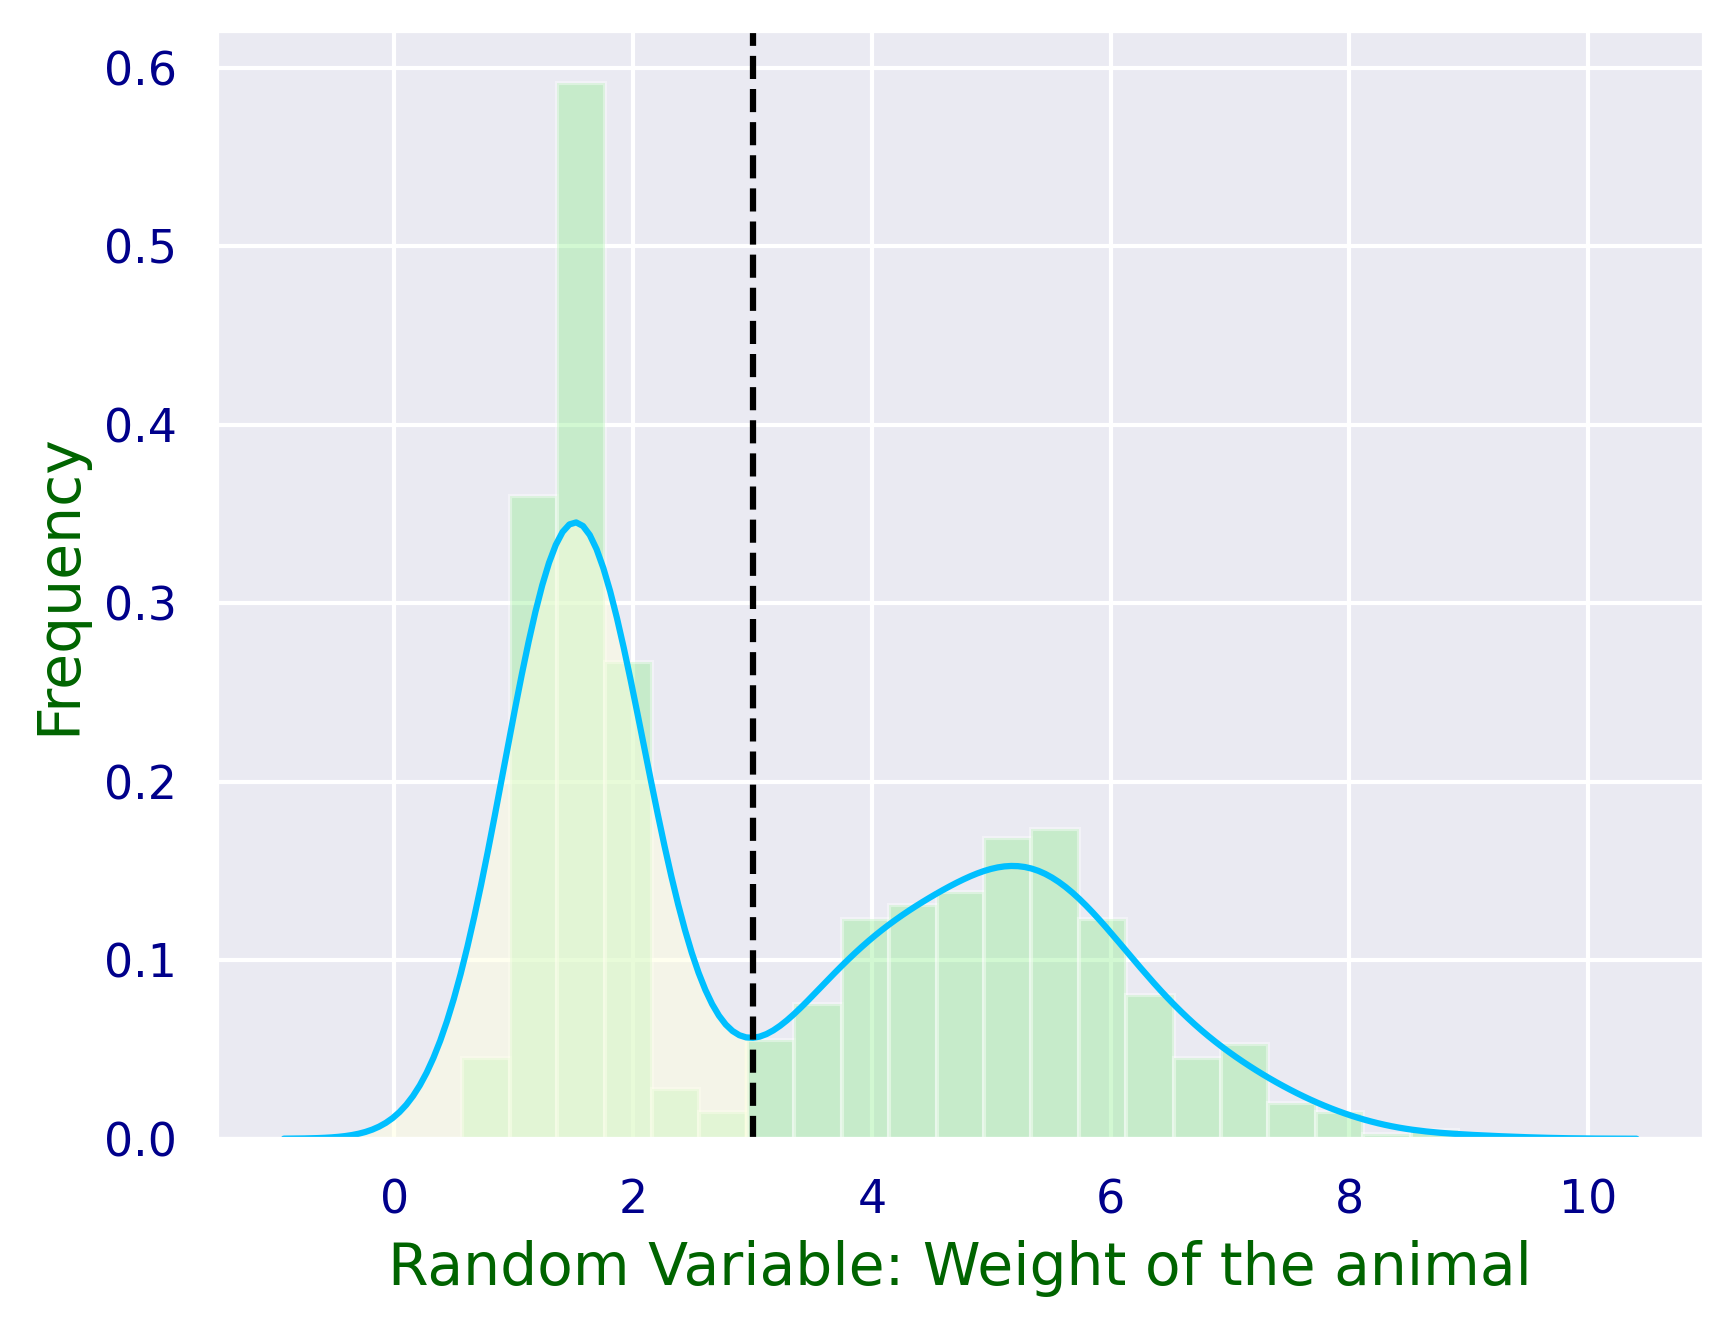

In [ ]:
plt.figure()
# here we simualte two populations: squirrels and rabbits
data_weights = np.concatenate([norm.rvs(size=500,loc=1.5,scale=0.3),norm.rvs(size=500,loc=5,scale=1.25)],axis=0)
data_weights = np.round(data_weights,2)
animal = np.repeat([0,1],500)
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data_weights,
                  bins=21,
                  kde=True,
                  color='deepskyblue',
                  hist_kws={"color":'lightgreen'},
                  #fit=stats.norm,
                  #fit_kws={"color":'deepskyblue'}
                   )
ax1.set_xlabel('Random Variable: Weight of the animal',fontsize=14,color='darkgreen')
ax1.set_ylabel('Frequency',fontsize=14,color='darkgreen')
l1 = ax1.lines[0]
plt.axvline(x=3.0, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
ax1.fill_between(x,y, where = x <= 3.0, color='lightyellow',alpha=0.5)
plt.show()

In [ ]:
plt.figure()
# here we simualte two populations: squirrels and rabbits
data_weights = np.concatenate([norm.rvs(size=500,loc=1.5,scale=0.3),norm.rvs(size=500,loc=5,scale=1.25)],axis=0)
data_weights = np.round(data_weights,2)
animal = np.repeat([0,1],500)
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data_weights[animal==0],
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'cyan',"alpha":0.5},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue',"lw":2},
                  label="squirrels")
ax1 = sns.distplot(data_weights[animal==1],
                  bins=21,
                  kde=False,
                  color='darkred',
                  hist_kws={"color":'red',"alpha":0.5},
                  fit=stats.norm,
                  fit_kws={"color":'red',"lw":2},
                  label="rabbits"
                   )
ax1.set_xlabel('Random Variable: Weight of the animal',fontsize=14,color='darkgreen')
ax1.set_ylabel('Frequency',fontsize=14,color='darkgreen')
l1 = ax1.lines[0]
plt.axvline(x=2.4, color='black',linestyle='dashed')
plt.legend()
x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
ax1.fill_between(x,y, where = x <= 3.0, color='lightyellow',alpha=0.5)
plt.show()

#### <font color='navy'> Example with 2 input features - Decision Boundary </font>

The separation of the classes can be visualized in 2D.

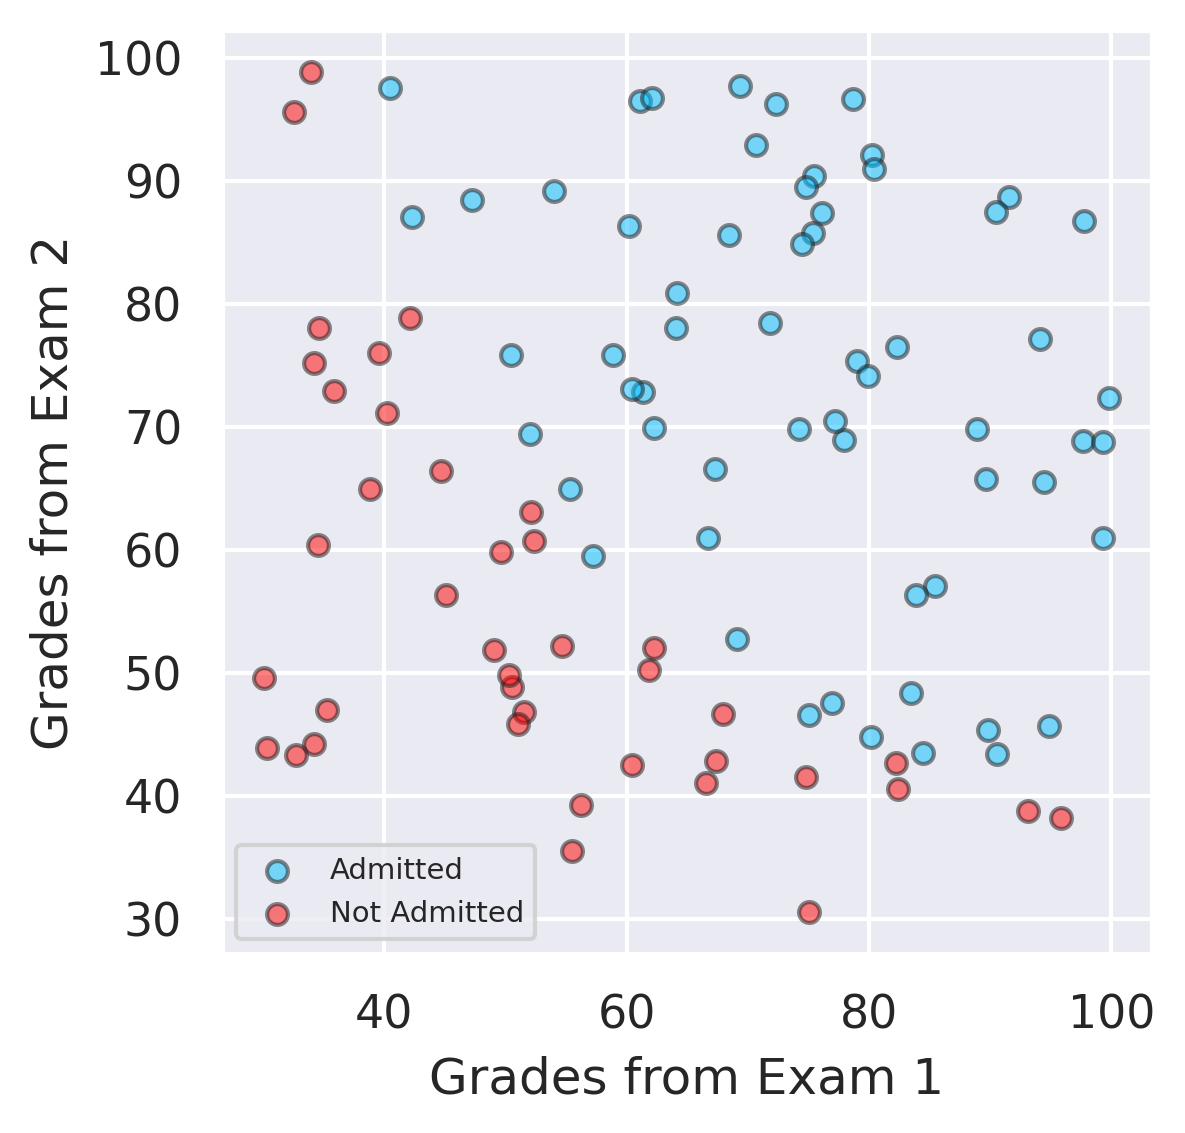

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix as CM


# function definitions
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# load the data from the file
# data = load_data("drive/MyDrive/Data Sets/example_data_classification.csv", header=None)

data = pd.read_csv('drive/MyDrive/Data Sets/example_data_classification.csv', header=None)

# X = feature values, all the columns except the last column
x = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]



# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.figure(figsize=(4,4))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
plt.xlabel("Grades from Exam 1")
plt.ylabel("Grades from Exam 2")
plt.legend(fontsize=7)
plt.show()

The decision boundary is

$$\large c_1\cdot E_1 + c_2\cdot E_2 + c_0 = 0 $$

This represents a straight line in feature space.

In [ ]:
# we fit a Logistic Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(x, y)
predicted_classes = model.predict(x)
accuracy = accuracy_score(y,predicted_classes)
print(model.coef_)
print(model.intercept_)
print(accuracy)

[[0.20535491 0.2005838 ]]
[-25.05219314]
0.89


In [ ]:
# Let's assume some new input data
E1 = 75
E2 = 85
l = -25.05219314 + 0.20535491*E1 +0.2005838*E2

In [ ]:
l

7.399048110000001

In [ ]:
# now to compute the probability we use the logistic sigmoid function
1/(1+np.exp(-l))

0.9993885392294947

In [ ]:
model.predict_proba([[45,75]])

array([[0.68296616, 0.31703384]])

If we only want to predict probabilities, then in this particular example we have:

$$l\overset{\Delta}{=}c_0+c_1\cdot E_1 + c_2\cdot E_2$$

and the probability of admission is calculated as follows:

$$\large p=\frac{1}{1+e^{-l}}$$

### Visualize the Decision Boundary

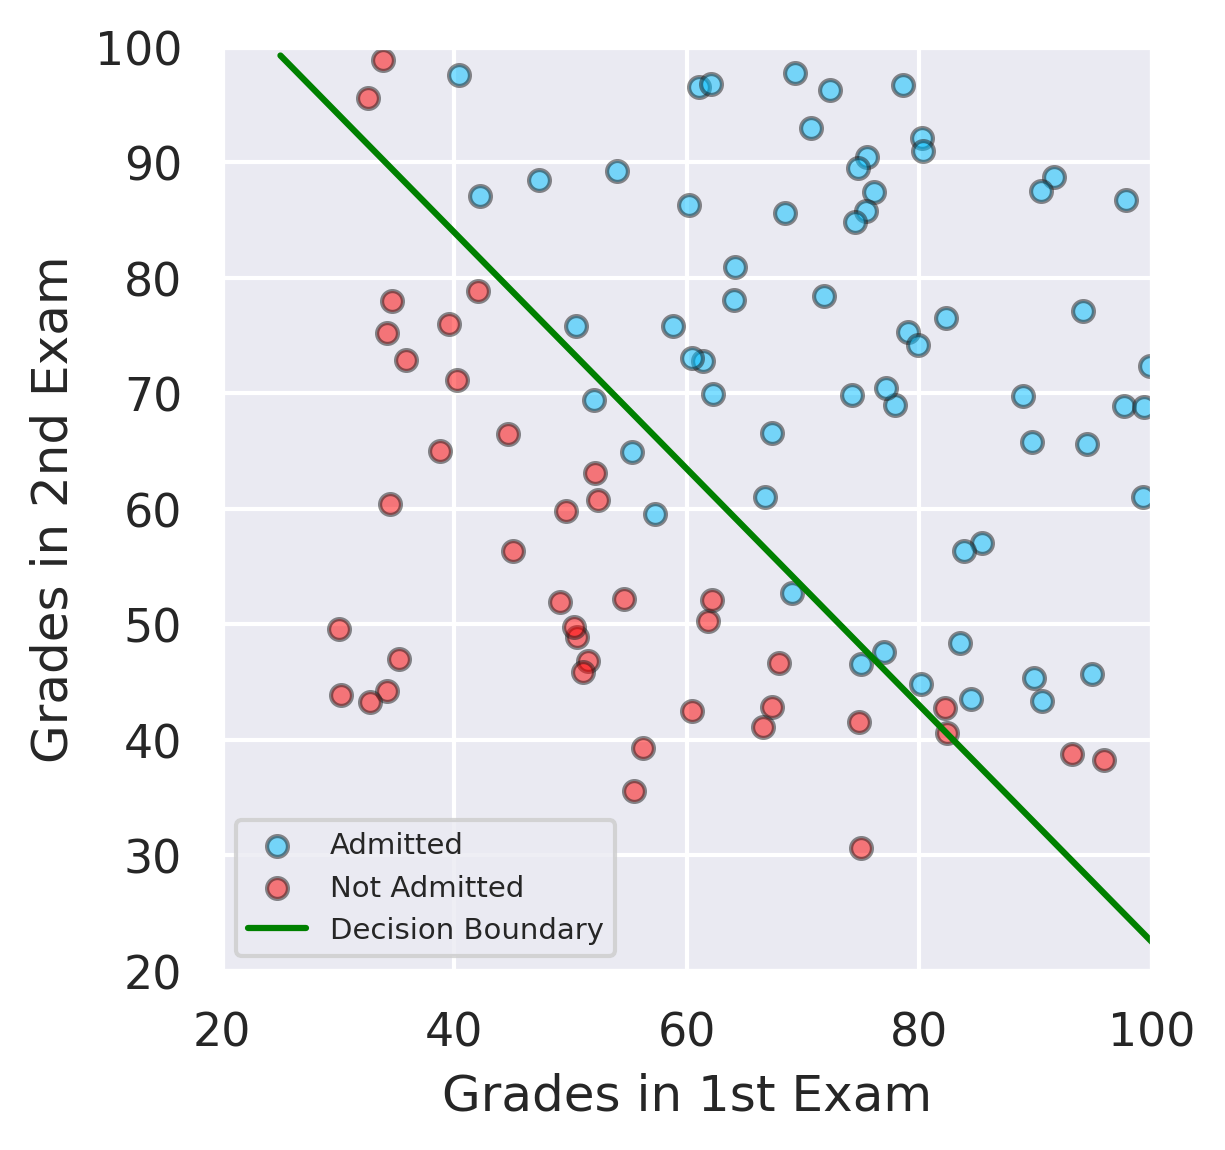

In [ ]:
# Here we visualize hte decision boundary
# E1_values mean grades from Exam 1 and E2_values mean grades from Exam 2
E1_values = [np.min(x.values[:, 0] - 5), np.max(x.values[:, 0] + 5)]
E2_values = - (model.intercept_ + model.coef_[:,0]*E1_values) / model.coef_[:,1] # the decision boundary equation

# plots
plt.figure(figsize=(4,4))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
plt.plot(E1_values, E2_values, label='Decision Boundary',color='green')
plt.xlim(20,100)
plt.ylim(20,100)
plt.xlabel('Grades in 1st Exam')
plt.ylabel('Grades in 2nd Exam')
plt.legend(fontsize=7)
plt.show()

In [ ]:
# We want to predict for a new student the probability of admission:
model.predict_proba([[78,65]]) # this student was admitted


array([[0.0179256, 0.9820744]])

In [ ]:
p=model.predict_proba([[82,45]])

In [ ]:
# The probability that the student was not admitted
print('The probability that the student was not admitted (according to logistic regression) is : ' +str(100*p[:,0][0]) + '%')

The probability that the student was not admitted (according to logistic regression) is : 30.72130937437507%


In [ ]:
# The probability the student was admitted
p[:,1]

array([0.44209148])

In [ ]:
sum(p[0,:])

1.0

##K-Nearest Neighbors Algorithm
###<font color='red'> Big Idea: The proximity is very important.</font>

<font color='blue'> The classification is decided by the votes of the $k$-nearest neighbors; if $k$ is an odd natural number such as $2p+1$ then we know the vote is not a tie.

<font color='forestgreen'> The votes can be weighted (if we want) by the inverse of the Euclidean distance.</font>



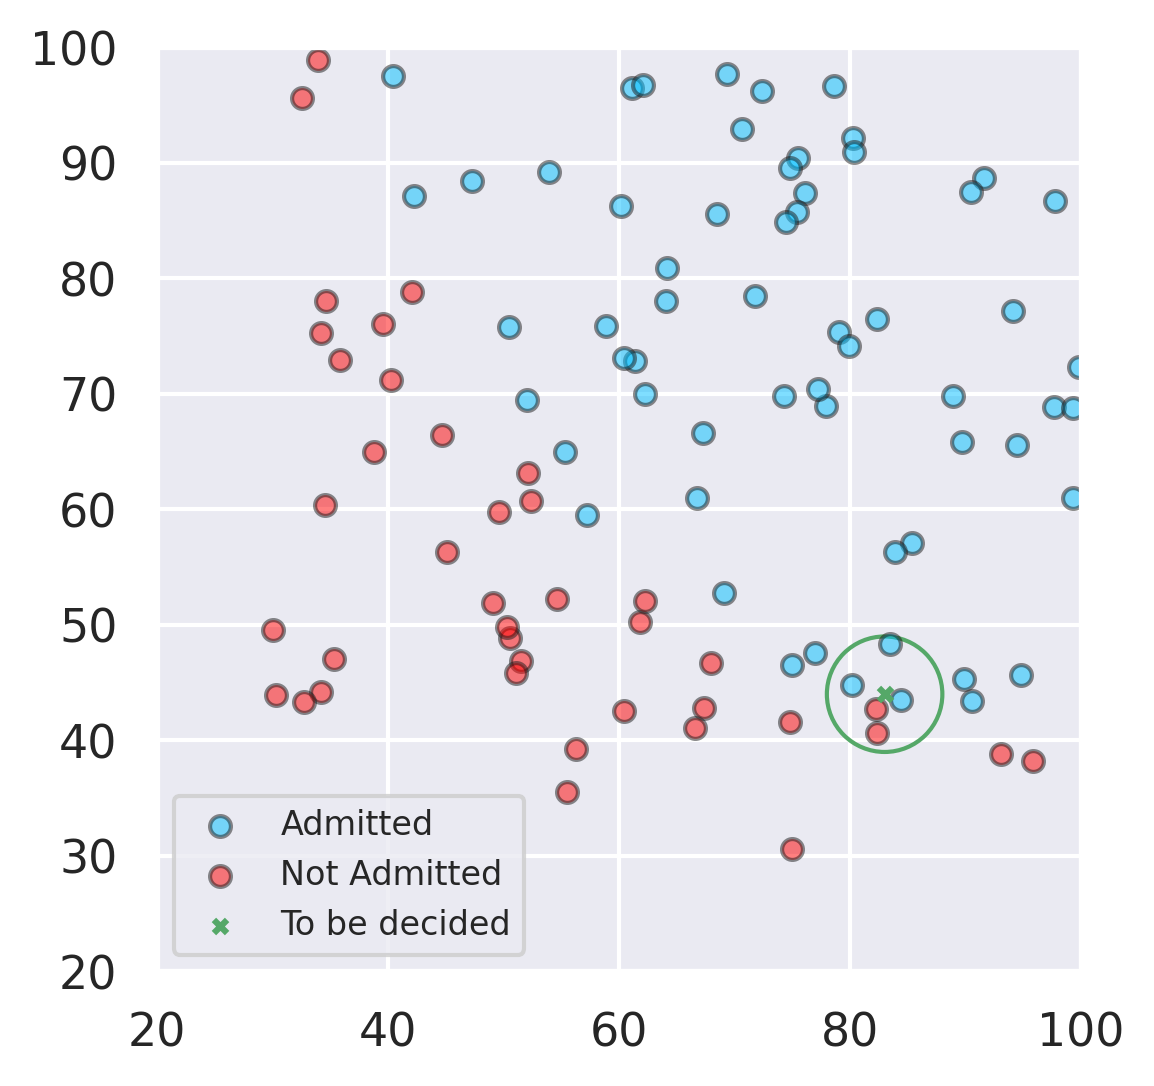

In [ ]:
from IPython.core.pylabtools import figsize

fig, ax = plt.subplots(figsize=(4,4))

circle = plt.Circle((83, 44), 5, color='g', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((20, 100))
ax.set_ylim((20, 100))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')
ax.add_artist(circle)

ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color='red', s=25, ec='k',alpha=0.5,label='Not Admitted')
ax.scatter(83,44, s=10,marker='x',color='g',label='To be decided')
ax.set_aspect('equal', 'box')
plt.legend(fontsize=8)
#fig.savefig('plotcircles2.png')
plt.show()

In [ ]:
n_neighbors = 5
h = .1 # step size in the grid of points
cmap_light = ListedColormap(['#FF8080', 'lightcyan'])
cmap_bold = ListedColormap(['red', 'navy'])

In [ ]:
# setup import KNN classifier from SKlearn
from sklearn import neighbors

Accuracy : 0.95
Accuracy : 1.0


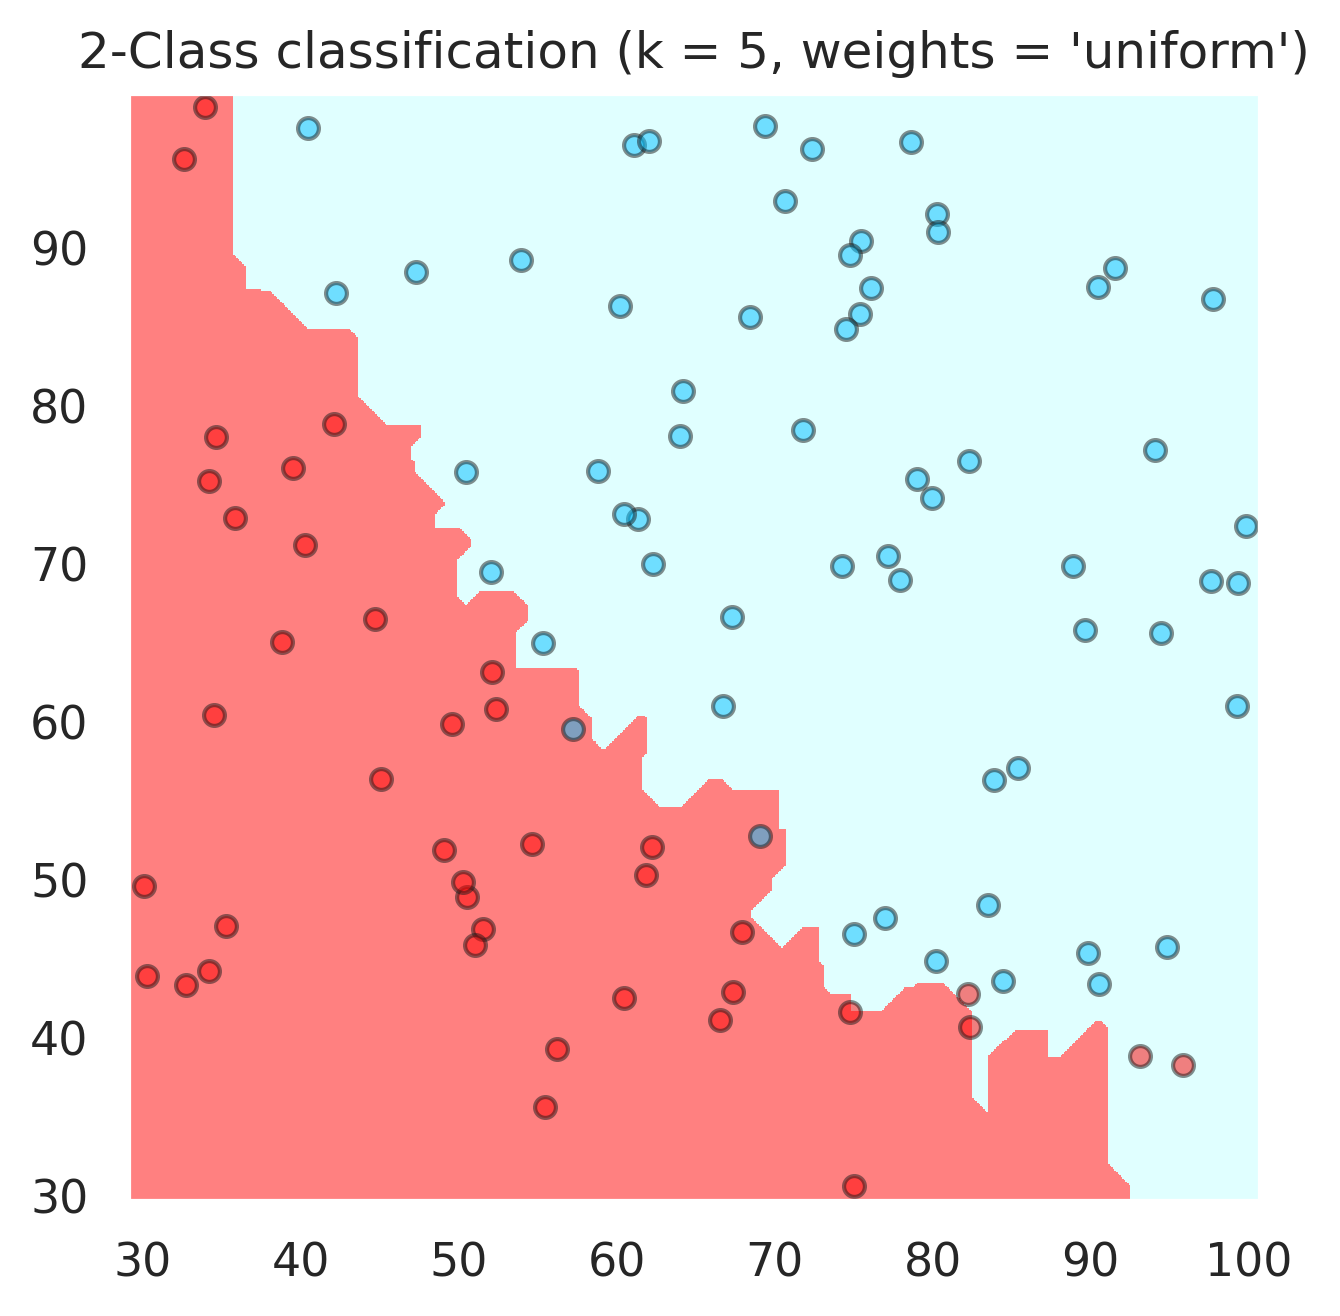

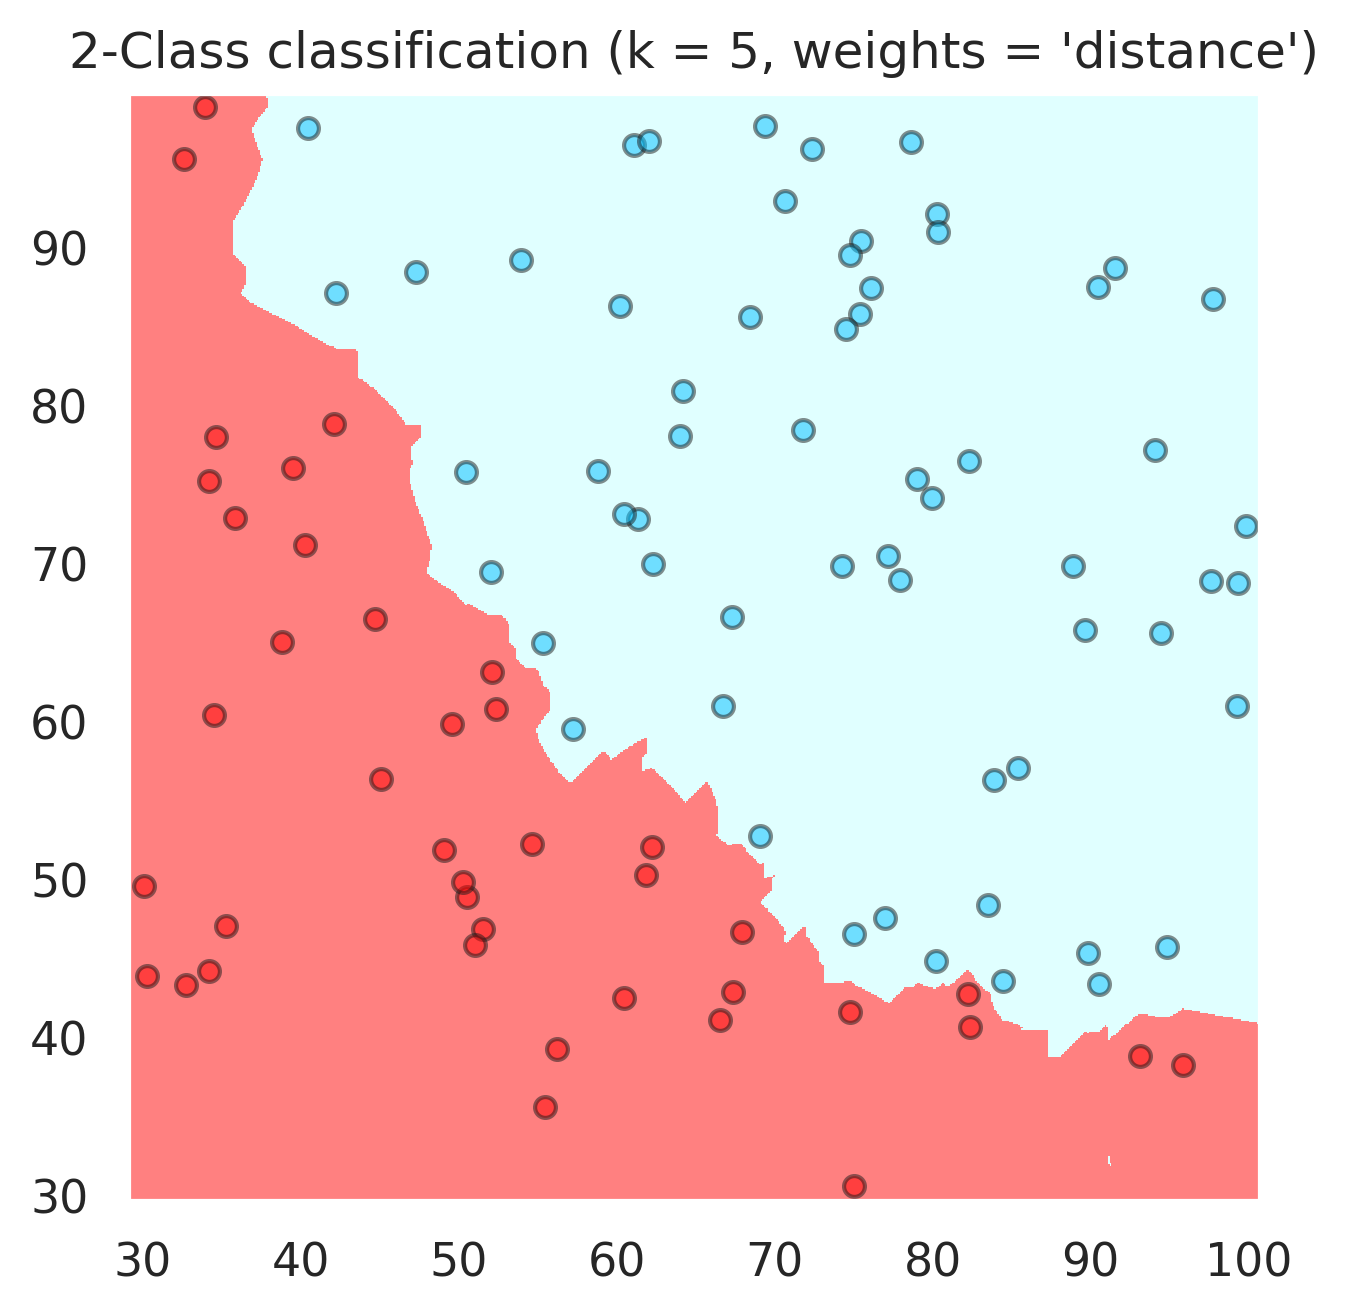

In [ ]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights,p=1)
    clf.fit(x, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x.values[:, 0].min() - 1, x.values[:, 0].max() + 1
    y_min, y_max = x.values[:, 1].min() - 1, x.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the points
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
    plt.scatter(not_admitted.iloc[:, 0] ,not_admitted.iloc[:, 1], color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_aspect('equal', 'box')
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    print('Accuracy : ' + str(accuracy_score(y,clf.predict(x))))

plt.show()

### <font size=6pt>Support Vector Machines (the kernel "trick")

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IuYqAUe7cV8pwxwTUlxQTVUPI2smrcME'
width='1000px' />
<figcaption>SVM with Radial Basis Function Kernel</figcaption></center>
</figure>

For this we would need at least one landmark point $x_0$. The following is also called a "Gaussian" kernel

$$\Large
(x,y) \rightarrow \left(x,y,z:=e^{-\gamma[(x-x_0)^2+(y-y_0)^2]}\right)
$$

In [ ]:
from sklearn import svm

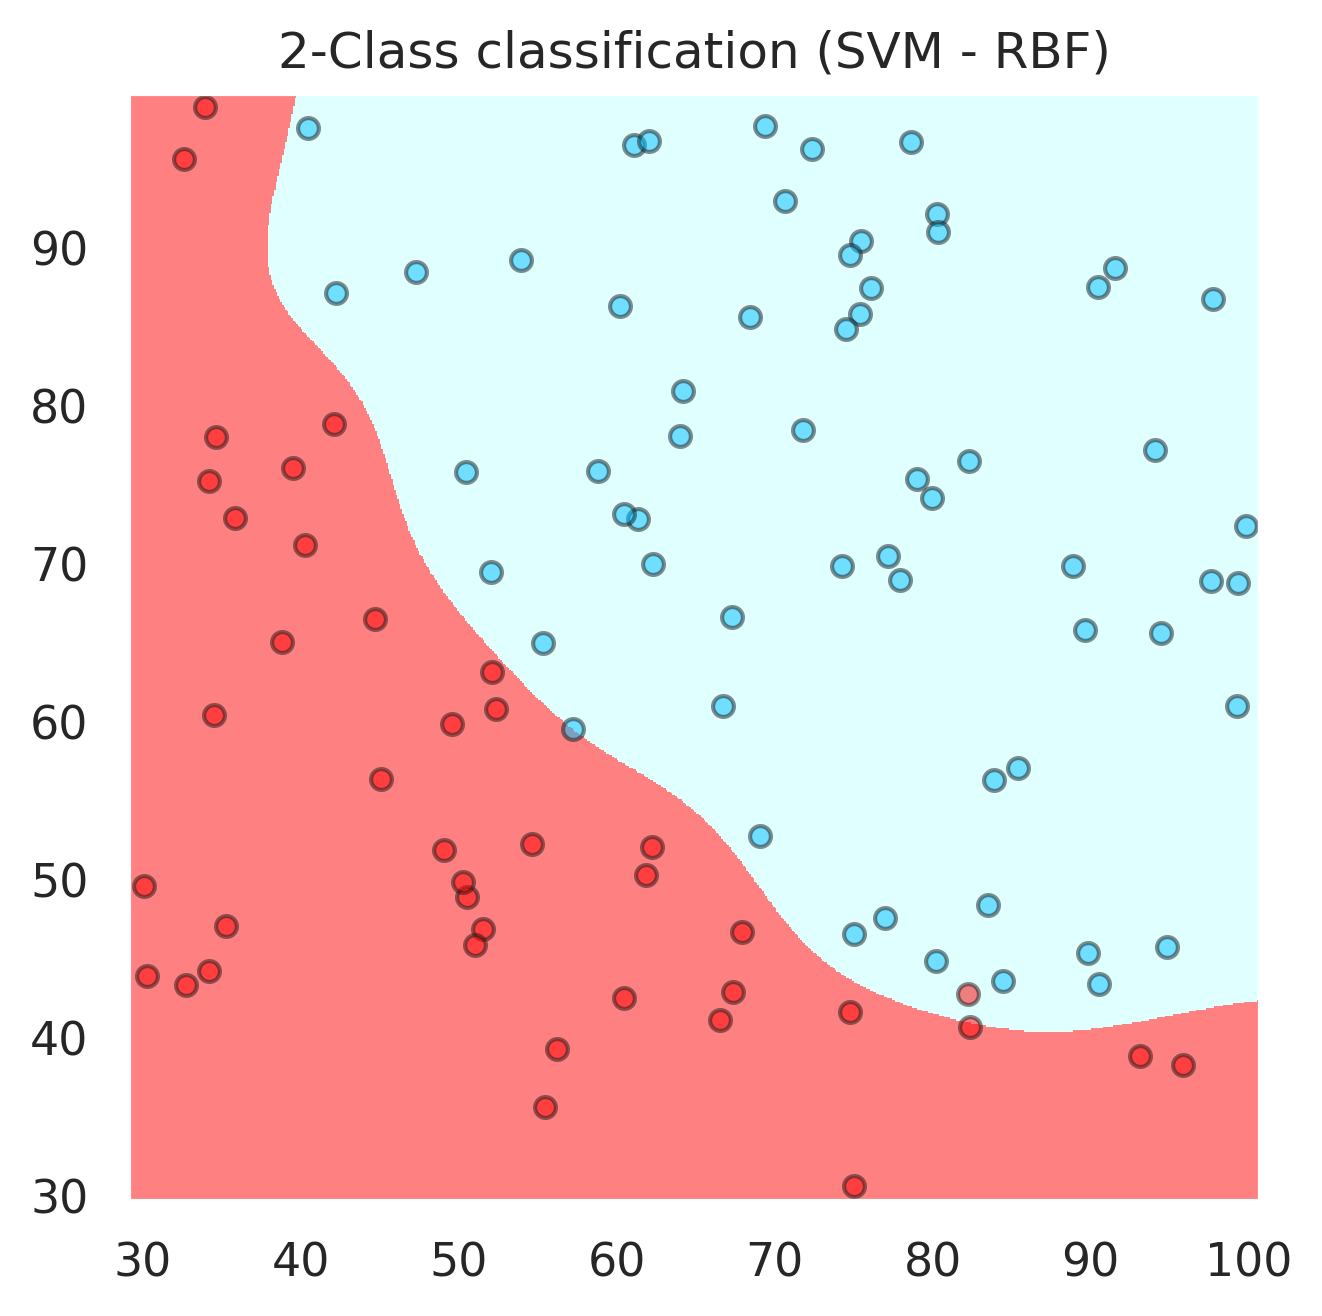

In [ ]:
# here we have an application of SVM with Gaussian kernel
svc = svm.SVC(kernel='rbf', C=1,gamma=0.008,probability=True).fit(x, y)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - RBF)")

plt.show()

In [ ]:
svc.score(x,y)

0.91

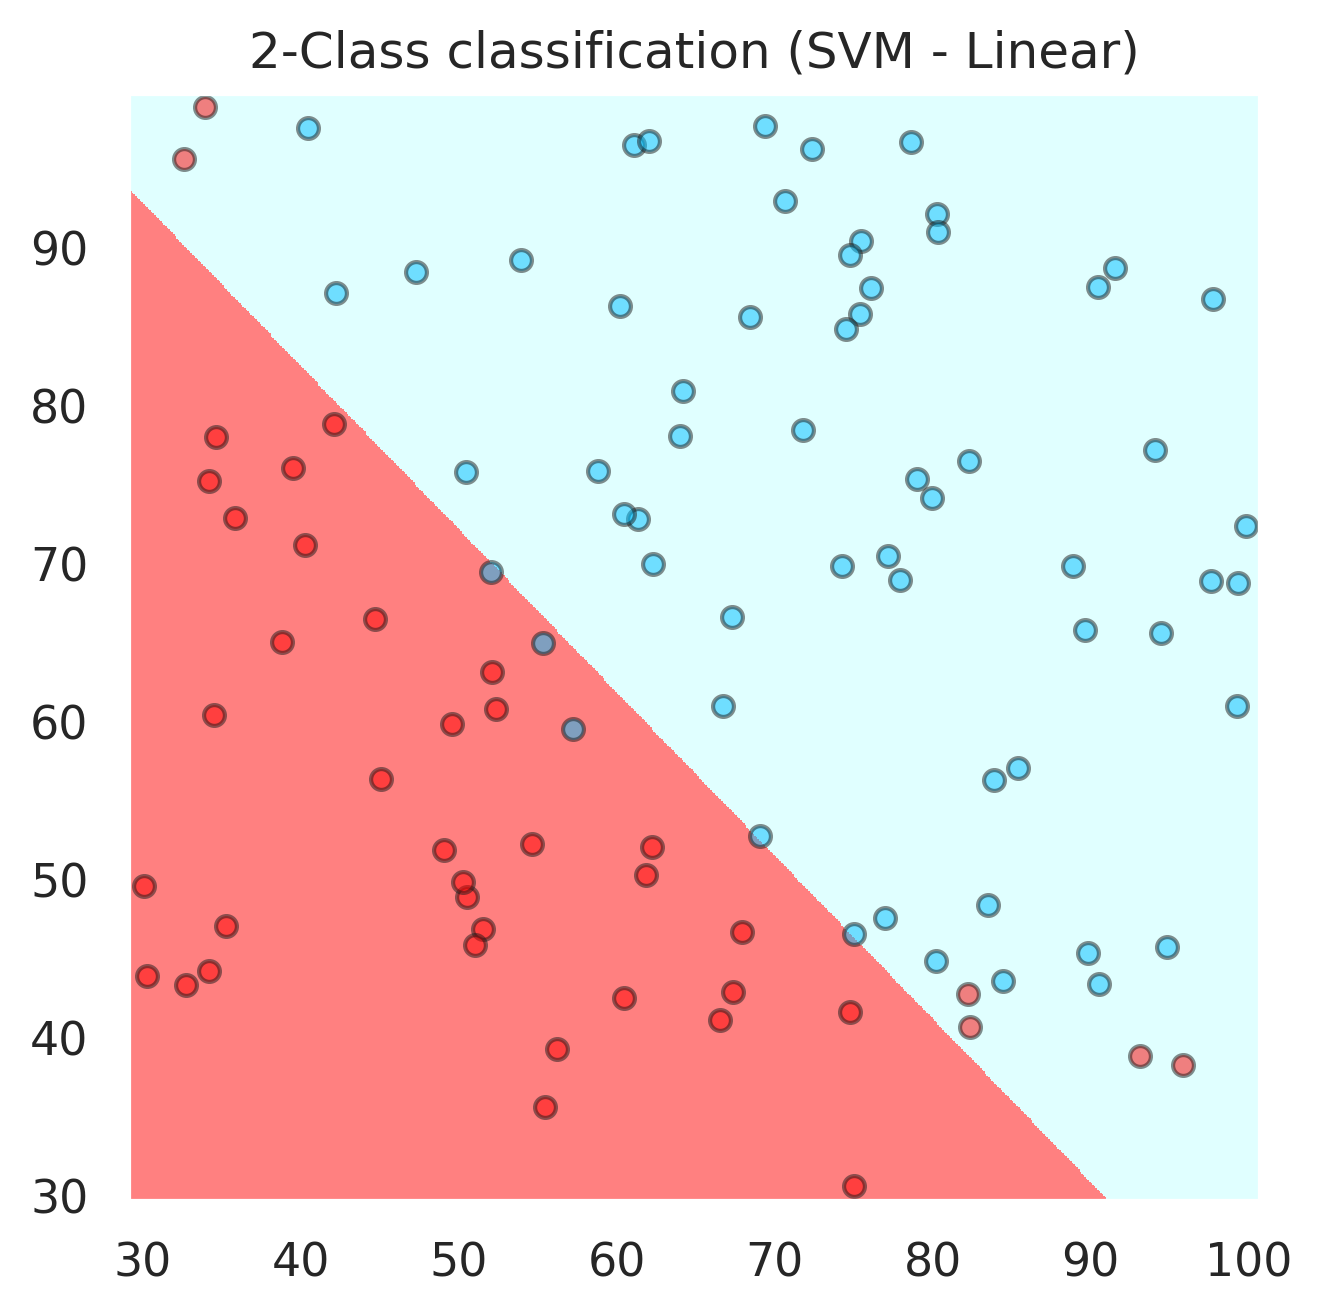

In [ ]:
svc = svm.SVC(kernel='linear', C=1,gamma='auto',probability=True).fit(x, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - Linear)")

plt.show()

In [ ]:
accuracy_score(y,svc.predict(X))

0.91

In [ ]:
svc.predict_proba([[70,67]])

array([[0.10848745, 0.89151255]])

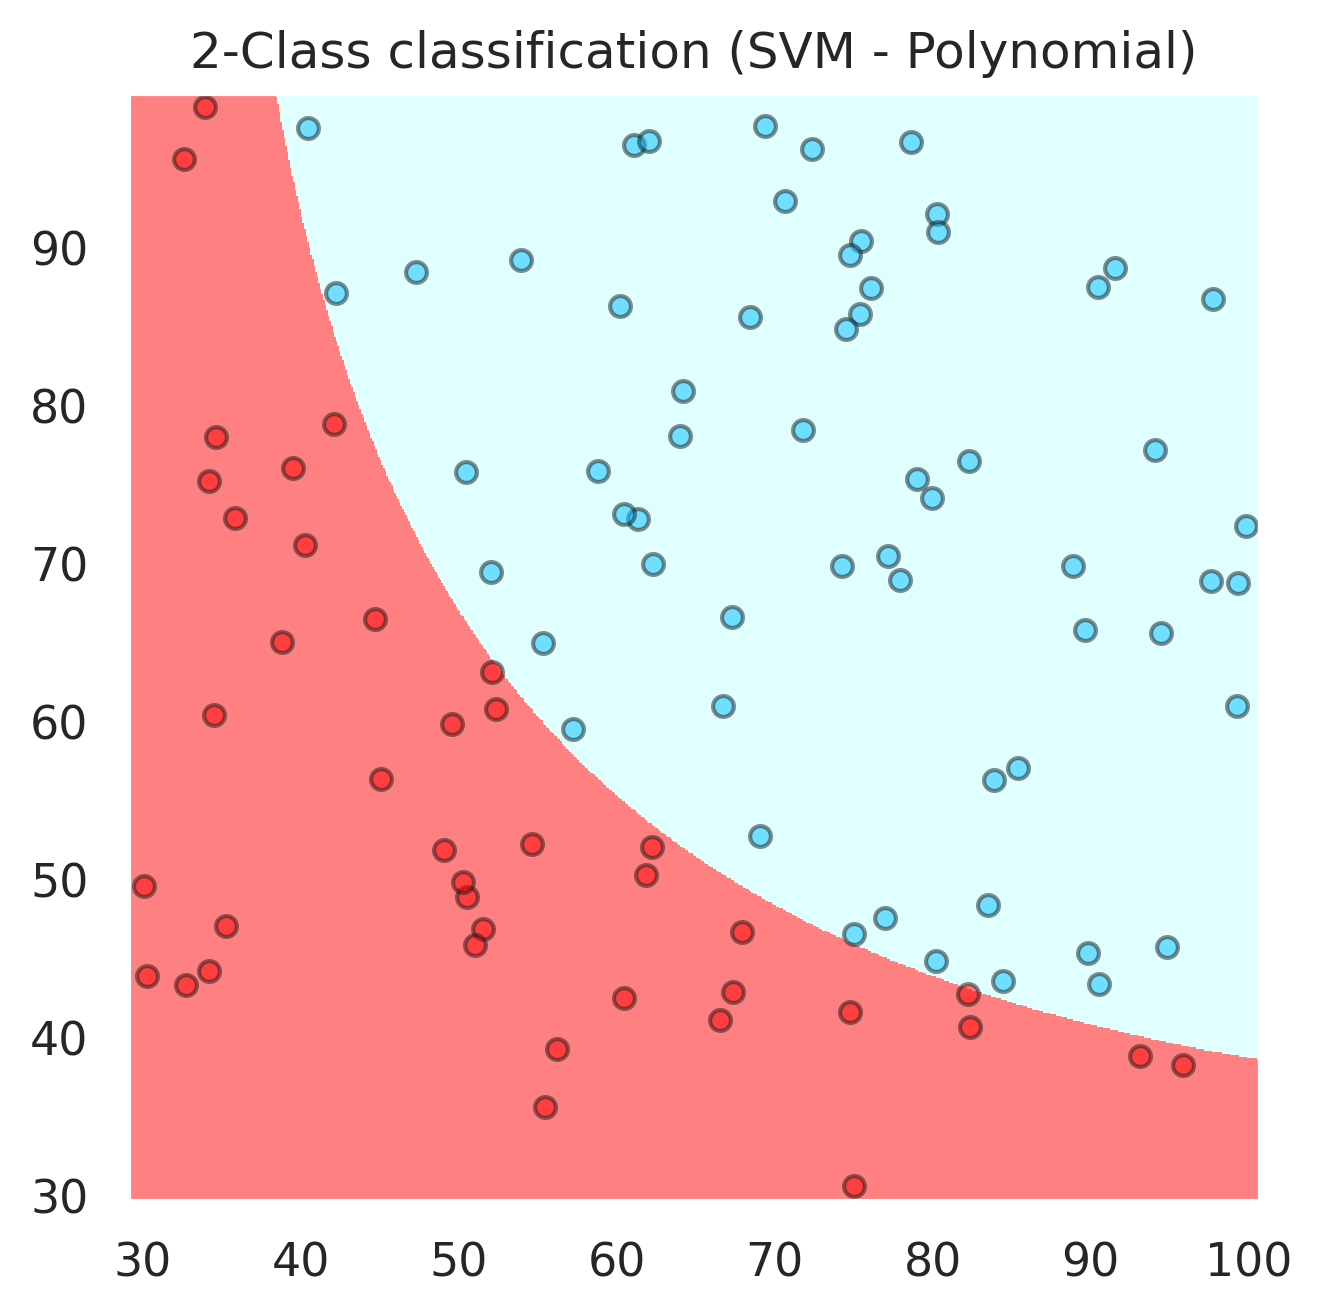

In [ ]:
svc = svm.SVC(kernel='poly', C=20,probability=True,degree=2).fit(x, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],  color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("2-Class classification (SVM - Polynomial)")

plt.show()

In [ ]:
accuracy_score(y,svc.predict(x))

1.0

In [ ]:
svc.predict_proba([[50,50]])

array([[0.95760218, 0.04239782]])

In [ ]:
svc.predict_proba([[84,40]])

array([[0.77501341, 0.22498659]])